### `Offscreen` viewer usage

In [1]:
import mujoco_viewer
import mujoco
import numpy as np
import matplotlib.pyplot as plt
from mujoco_parser import MuJoCoParserClass
from util import sample_xyzs

np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

print ("MuJoCo version:[%s]"%(mujoco.__version__))

MuJoCo version:[2.3.4]


### Parse

In [2]:
xml_path = '../asset/ur5e/scene_ur5e_rg2_obj.xml'
env = MuJoCoParserClass(name='UR5e with RG2 gripper',rel_xml_path=xml_path,VERBOSE=True)
obj_names = [body_name for body_name in env.body_names
             if body_name is not None and (body_name.startswith("obj_"))]
n_obj = len(obj_names)
# Place objects in a row
xyzs = sample_xyzs(n_sample=n_obj,
                   x_range=[0.45,1.65],y_range=[-0.38,0.38],z_range=[0.81,0.81],min_dist=0.2)
colors = np.array([plt.cm.gist_rainbow(x) for x in np.linspace(0,1,n_obj)])
for obj_idx,obj_name in enumerate(obj_names):
    jntadr = env.model.body(obj_name).jntadr[0]
    env.model.joint(jntadr).qpos0[:3] = xyzs[obj_idx,:]
    geomadr = env.model.body(obj_name).geomadr[0]
    env.model.geom(geomadr).rgba = colors[obj_idx] # color

# Move tables and robot base
env.model.body('base_table').pos = np.array([0,0,0])
env.model.body('front_object_table').pos = np.array([1.05,0,0])
env.model.body('side_object_table').pos = np.array([0,-0.85,0])
env.model.body('base').pos = np.array([0,0,0.8])
print ("Ready.")

dt:[0.0020] HZ:[500]
n_body:[50]
geom_names:['floor', None, None, None, None, None, 'ur_shoulder_link_collision', None, None, None, None, 'ur_upper_arm_link_1_collision', 'ur_upper_arm_link_2_collision', None, None, None, None, 'ur_forearm_link_1_collision', 'ur_forearm_link_2_collision', None, None, None, 'ur_wrist_1_link_collision', None, None, None, 'ur_wrist_2_link_1_collision', 'ur_wrist_2_link_2_collision', None, 'ur_wrist_3_link_collision', 'ur_tcp_link_collision', 'camera_mount_collision', 'camera_mounted_gear_collision', 'ur_rg2_gripper_base_link_collision', 'camera_center_collision', 'ur_rg2_gripper_finger1_finger_link_collision', 'ur_rg2_gripper_finger1_inner_knuckle_link_collision', 'ur_rg2_gripper_finger1_finger_tip_link_collision', 'ur_rg2_gripper_finger2_finger_link_collision', 'ur_rg2_gripper_finger2_inner_knuckle_link_collision', 'ur_rg2_gripper_finger2_finger_tip_link_collision', 'front_object_table', 'side_object_table', 'base_table', None, None, None, None, None, No

### Instantiate offscreen viewer

In [3]:
viewer_offscreen = mujoco_viewer.MujocoViewer(env.model, env.data,mode='offscreen')
print("Done.")

Done.


### Test on `env.forward()`: forward kinematics

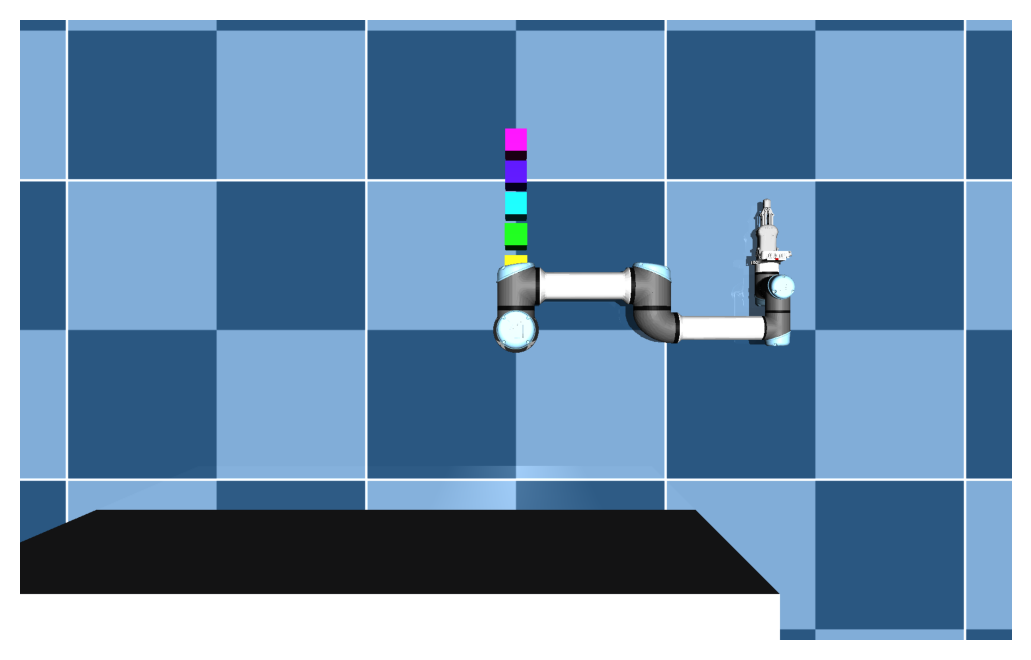

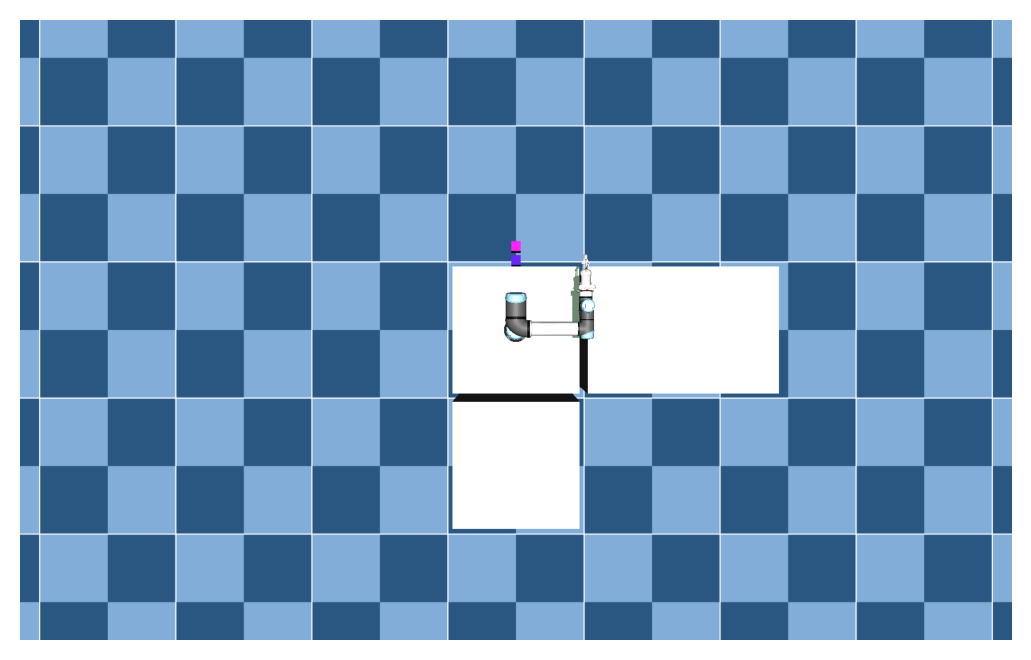

In [4]:
viewer_offscreen.cam.azimuth = 90
viewer_offscreen.cam.elevation = -90
viewer_offscreen.cam.distance = 0.5
viewer_offscreen.cam.lookat = np.array([0,0,2.0])

offscreen_img = viewer_offscreen.read_pixels()
plt.imshow(offscreen_img); plt.axis('off')
plt.show()

env.forward(q=np.radians([0,-90,90,0,0,0]),joint_idxs=env.idxs_forward)

viewer_offscreen.cam.azimuth = 90
viewer_offscreen.cam.elevation = -90
viewer_offscreen.cam.distance = 0.5
viewer_offscreen.cam.lookat = np.array([0,0,5.0])

offscreen_img = viewer_offscreen.read_pixels()
plt.imshow(offscreen_img); plt.axis('off')
plt.show()

### Test on `env.step()`: forward dynamics

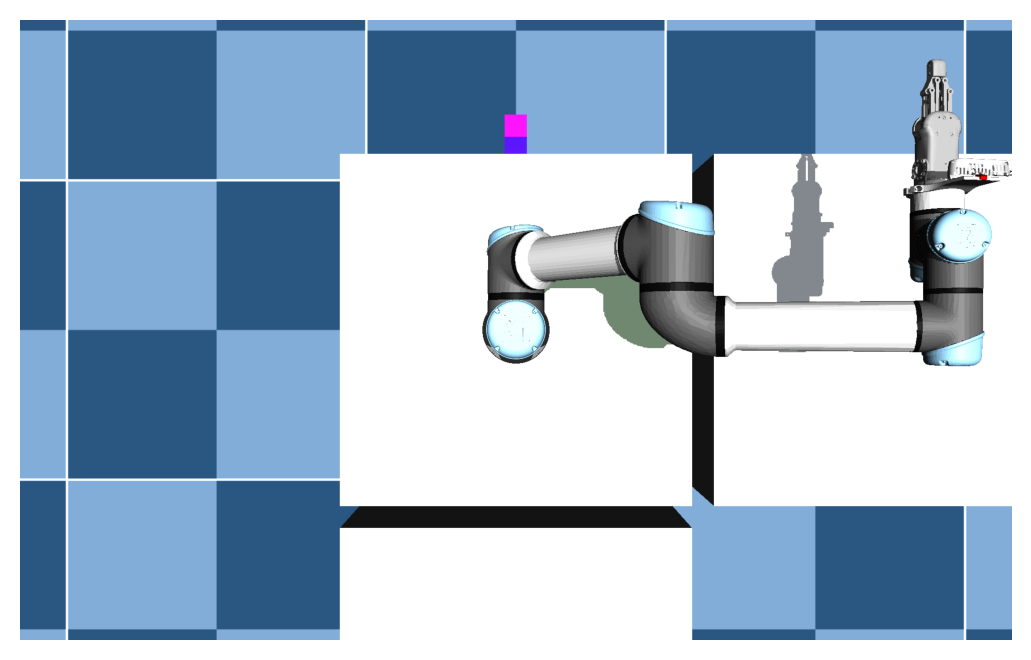

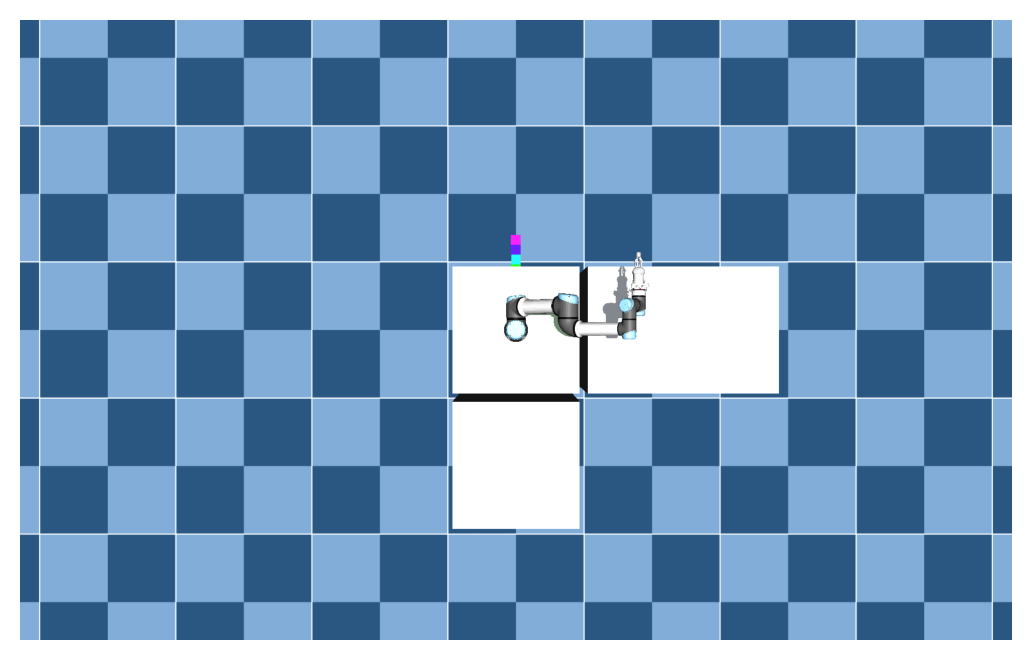

In [7]:
viewer_offscreen.cam.azimuth = 90
viewer_offscreen.cam.elevation = -90
viewer_offscreen.cam.distance = 0.5
viewer_offscreen.cam.lookat = np.array([0,0,2.0])

offscreen_img = viewer_offscreen.read_pixels()
plt.imshow(offscreen_img); plt.axis('off')
plt.show()

for i in range(100):
    env.step(ctrl=np.radians([0,-90,0,0,0,90])*np.random.random(6), ctrl_idxs=env.idxs_step)

viewer_offscreen.cam.azimuth = 90
viewer_offscreen.cam.elevation = -90
viewer_offscreen.cam.distance = 0.5
viewer_offscreen.cam.lookat = np.array([0,0,5.0])

offscreen_img = viewer_offscreen.read_pixels()
plt.imshow(offscreen_img); plt.axis('off')
plt.show()